In [5]:
"""
# File to make plot of EM and GW missions between 2020 - 2040
"""
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
import astropy.units as u
from astropy import constants as const


######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,25,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=MEDIUM_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize



# EM missions 

In [6]:

# Use pandas to read excel file
df = pd.read_excel('data/FutureDetectors.xlsx', header =0, skiprows= lambda x: x in [1], 
                   sheet_name = 'Electromagnet wave observations')
# pour it into Astropy table
EM_missions = Table.from_pandas(df)

# Add some extra columns
EM_missions['mission_start']   = EM_missions['mission_start_year'] + (EM_missions['mission_start_month']-1)/12.
EM_missions['mission_end']     = EM_missions['mission_end_year'] + (EM_missions['mission_end_month']-1)/12.
EM_missions['mid_mission']     = (EM_missions['mission_start'] + EM_missions['mission_end'])/2.
# wavelengths  SKA = ∼4.3 m (70 MHz) to ∼1 cm (30 GHz).
EM_missions['wavelen_center']  = (EM_missions['wavelen_end']  + EM_missions['wavelen_start'])/2.
EM_missions['freq_center']     = const.c/EM_missions['wavelen_center']

# Add Gaia DR
GaiaDR = Table()
GaiaDR['name']  = ['DR3', 'DR4']#, 'DR5']
GaiaDR['year']  = [2022, 2025]
GaiaDR['month'] = [6,    12]
GaiaDR['date']  = GaiaDR['year'] + (GaiaDR['month']-1)/12.
GaiaDR['wavelen_center']  = EM_missions['wavelen_center'][EM_missions['Name'] == 'Gaia'] 
GaiaDR['freq_center']     = EM_missions['freq_center'][EM_missions['Name'] == 'Gaia'] 

# display(EM_missions)



## With Frequency as main axis

SKA2 10.05357482899112
JWST 13.313957709606001
ELT 14.312467847143491
Gaia 14.637971612190672
BlackGEM 14.657276767386058
BlackGEM
Rubin (LSST) 14.637971612190672
SDSS-V 14.46188035313499
LUVOIR 15.07888069425589
Athena 16.978303391466294
XMM-Newton 16.69495766530373
Swift  16.984878003679952
eRosita 16.97473514370188


/var/folders/mc/hhcvbs7n2jq7d_hr2d6qvjhm0000gq/T/ipykernel_16217/2439978341.py:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(GaiaDR['date'], GaiaDR['freq_center'], c = colors[b], marker = 'd', s = 100)


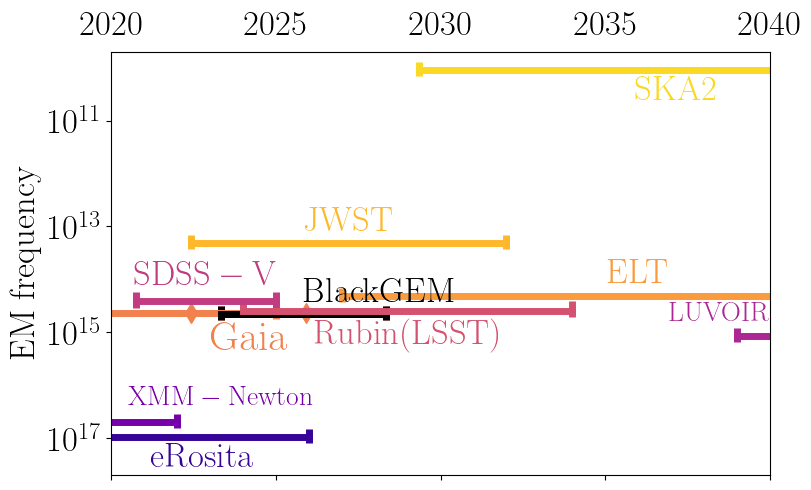

In [15]:

fig, ax = plt.subplots(figsize = (8.5,11/2))

colors = sns.color_palette("plasma", len(EM_missions) )[::-1]#mako 
# colors = sns.color_palette("RdYlBu_r", len(EM_missions) )[::-1] 


############
# plot the data
for i in range(len(EM_missions)):        
    print(EM_missions['Name'][i] , np.log10(EM_missions['freq_center'][i]) )

    # shift data and annotations
    yshift, text_fact, align, rot = 1, 0.8, 'bottom', 0

    ## Plot the missions
    #Rubin and SDSS-V are shifted away from their actual wavelen for clarity purposes 
    if EM_missions['Name'][i] in ['SDSS-V', 'Rubin (LSST)']:
        yshift    = 0.9#1000*1e-9
        text_fact = 0.6
    plt.errorbar((EM_missions['mission_start'][i], EM_missions['mission_end'][i]), (EM_missions['freq_center'][i]*yshift, EM_missions['freq_center'][i]*yshift),
             yerr = EM_missions['freq_center'][i]*0.3, c=colors[i], lw = 5)
    
    # Plot the name of the mission
    if EM_missions['Name'][i] in ['eRosita', 'SKA2', 'Rubin (LSST)']:
        text_fact, align = 1.25, 'top' #plot below line
    if EM_missions['Name'][i] not in ['BlackGEM']:
        plt.text(EM_missions['mid_mission'][i], EM_missions['freq_center'][i]*text_fact,
                '$\mathrm{%s}$'%(EM_missions['Name'][i]), c=colors[i], rotation = rot,
                ha = 'center', va = align).set_clip_on(True)

    # Plot BlackGEM by hand
    if EM_missions['Name'][i] in ['BlackGEM']:
        plt.errorbar((EM_missions['mission_start'][i], EM_missions['mission_end'][i]), (EM_missions['freq_center'][i]*yshift, EM_missions['freq_center'][i]*yshift),
                yerr = EM_missions['freq_center'][i]*0.3, c='k', lw = 5)
        print(EM_missions['Name'][i])
        plt.text(EM_missions['mid_mission'][i], EM_missions['freq_center'][i]*text_fact,'$\mathrm{%s}$'%(EM_missions['Name'][i]), 
                c='k', ha = 'left', va = 'bottom', size = 25 ).set_clip_on(True)


# Add some names by hand
a = np.where(EM_missions['Name'] == 'XMM-Newton')[0][0]
plt.text(2020.5, 3e16,'$\mathrm{%s}$'%(EM_missions['Name'][a]), 
         c=colors[a], ha = 'left', va = 'bottom', size = 20 ).set_clip_on(True)

b = np.where(EM_missions['Name'] == 'Gaia')[0][0]
plt.text(2023, 6e14,'$\mathrm{%s}$'%(EM_missions['Name'][b]), 
         c=colors[b], ha = 'left', va = 'top', size = 30 ).set_clip_on(True)

c = np.where(EM_missions['Name'] == 'LUVOIR')[0][0]
plt.text(2040, 8e14,'$\mathrm{%s}$'%(EM_missions['Name'][c]), 
         c=colors[c], ha = 'right', va = 'bottom', size = 20 ).set_clip_on(True)
    
# Add gaia DR
plt.scatter(GaiaDR['date'], GaiaDR['freq_center'], c = colors[b], marker = 'd', s = 100)
    

# plotvalues
ax.set_ylabel('$\mathrm{EM \ frequency}$', fontsize = 25)
ax.set_yscale('log')
ax.set_ylim(5e17, 5e9)
# ax.set_ylim(5e17, 5e12)

# move the x-axis tick labels to the top
ax.tick_params(axis='x', which='both', labelbottom=False, labeltop=True)
ax.xaxis.set_label_position('top')
# ax.set_xlabel('$\mathrm{year}$')
ax.set_xlim(2020, 2040)
ax.set_xticks([2020,2025,2030,2035,2040])


plt.savefig('EM_missions_20yr_freq.pdf', bbox_inches='tight', transparent=True)

plt.show()

## Gravitaional wave missions

In [4]:
# Use pandas to read excel file
df = pd.read_excel('data/FutureDetectors.xlsx', header =0, 
                   sheet_name = 'Gravitational wave observations')
# pour it into Astropy table
GW_missions = Table.from_pandas(df)

# Add some extra columns
GW_missions['mission_start']   = GW_missions['mission_start_year'] + (GW_missions['mission_start_month']-1)/12.
GW_missions['mission_end']     = GW_missions['mission_end_year'] + (GW_missions['mission_end_month']-1)/12.
GW_missions['mid_mission']     = (GW_missions['mission_start'] + GW_missions['mission_end'])/2.
GW_missions['freq_center'] = (GW_missions['freq_end']  + GW_missions['freq_start'])/2.


# display(GW_missions)

# Add SKA-era PTAs “Square-Kilometre-Array” (SKA) (e.g. Terzian & Lazio 2006).
#     Phase 1: Providing ~10% of the total collecting area at low and mid frequencies by 2023 (SKA1).[29]
#     Phase 2: Completion of the full array (SKA2) at low and mid frequencies by 2030.[30]
# 70 Months From July 01, 2021  = May 01, 2027 
# souce https://www.skao.int/en/science-users/159/scientific-timeline
SKADR = Table()

SKADR['name']  = ['SKA2']#'SKA1', 
SKADR['year']  = [2029]#2021, 
SKADR['month'] = [5]#7,   
SKADR['date']  = SKADR['year'] + (SKADR['month']-1)/12.
SKADR['opt_freq']     = GW_missions['opt_freq'][GW_missions['Name'] == 'PTA'] 

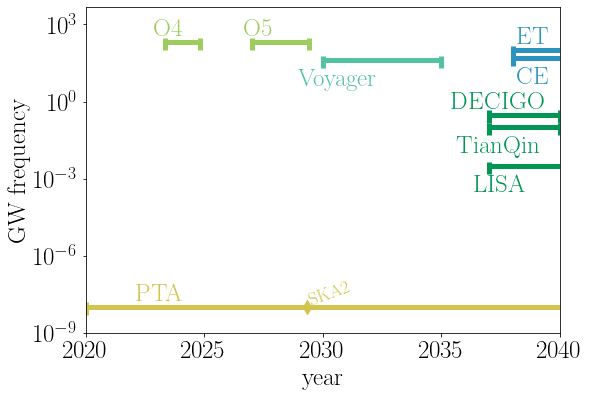

In [5]:

fig, ax = plt.subplots(figsize = (8.5,6))

CEET_col = '#2c93bf'
space_col = '#029656'
voy_col = '#53C2A3'
O4O5_col = '#9ecc5e'
PTA_col = '#d1c54f'
colors = [PTA_col, O4O5_col,O4O5_col,voy_col, space_col,space_col,space_col, CEET_col, CEET_col]
# colors = ['#B2D927', '#1E9C79','#1E9C79','#53C2A3', '#36A458', '#36A458', '#36A458', '#005931','#005931']

GW_missions.sort('mission_start')

############
# plot the actual data
for i in range(len(GW_missions)):
    if GW_missions['Name'][i] == 'BBO':
        continue
    plt.errorbar((GW_missions['mission_start'][i], GW_missions['mission_end'][i]), (GW_missions['opt_freq'][i], GW_missions['opt_freq'][i]),
             yerr = GW_missions['opt_freq'][i]*0.5, c=colors[i], lw = 5)
    
    # Plot the name of the mission
    text_fact, align = 1.15, 'bottom'
    if GW_missions['Name'][i] in ['CE', 'TianQin', 'Voyager', 'LISA']:
        text_fact, align = 0.5, 'top' #plot below line
    plt.text((GW_missions['mid_mission'][i]+ 3*GW_missions['mission_start'][i])/4, GW_missions['opt_freq'][i]*text_fact,
             '$\mathrm{%s}$'%(GW_missions['Name'][i]), c=colors[i], ha = 'center', va = align).set_clip_on(True)

    
# Add SKA DR
plt.scatter(SKADR['date'], SKADR['opt_freq'], c = colors[0], marker = 'd', s = 100)
plt.text(SKADR['date'], SKADR['opt_freq']*1.15, s = '$\mathrm{%s}$'%(SKADR['name'][0]),
         c = colors[0], fontsize = 18, rotation =20)
    


# plotvalues
ax.set_ylabel('$\mathrm{GW \ frequency}$', fontsize = 25)
ax.set_yscale('log')
ax.set_ylim(1e-9, 5e3)
ax.set_xlabel('$\mathrm{year}$')
ax.set_xlim(2020, 2040)
ax.set_xticks([2020,2025,2030,2035,2040])

#Remove spine
# sns.despine(top=True, right=True, left=False, bottom=False)

plt.savefig('GW_missions_20yr.pdf', bbox_inches='tight', transparent=True)

plt.show()